# 3. GMM

Decide the optimal number of clusters k 
* BIC

Text(0.5, 1.0, 'Bayesian Information Criterion For Optimal k')

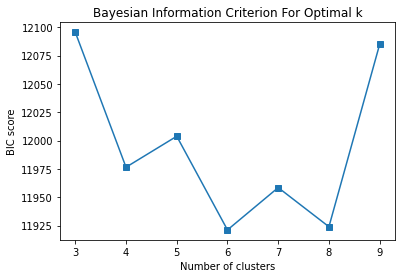

In [12]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_components = np.arange(3, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(transformed_data) for n in n_components]
bic = [m.bic(transformed_data) for m in models]
aic = [m.aic(transformed_data) for m in models]
plt.plot(n_components, bic,'s-')

plt.xlabel('Number of clusters')
plt.ylabel('BIC score');
plt.title('Bayesian Information Criterion For Optimal k')

In [33]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6,
                      covariance_type='full',
                      n_init=100,
                      random_state = 0).fit(transformed_data)
hidden_states = gmm.predict(transformed_data)
states = pd.DataFrame(hidden_states,index=train.index)
data_with_state = pd.concat([train,states],axis=1,sort='False').dropna()
data_with_state.rename(columns={0:'state'}, inplace=True)
data_with_state

,momentum_rsi,trend_cci,trend_mass_index,4_week_return,12_week_return,volatility_dcw,others_dr,Open,High,Low,Close,state
Date,,,,,,,,,,,,
1998-01-05,49.231019,-21.616250,26.659479,-0.025085,-0.025433,13.251013,-4.922125,544.479980,548.489990,514.869995,517.679993,4
1998-01-12,55.466632,-12.926268,26.743245,0.013700,0.011403,13.212305,3.484774,517.679993,537.429993,509.190002,535.719971,4
1998-01-19,54.704066,72.650718,26.746042,0.018623,0.038438,13.195110,-0.352788,535.719971,544.729980,530.760010,533.830017,4
1998-01-26,58.449950,-4.272169,26.927275,0.001451,0.047166,13.162906,2.143005,533.830017,551.080017,494.339996,545.270020,4
1998-02-02,63.570821,229.494143,26.950025,0.087969,0.084471,15.488280,3.291938,545.270020,563.950012,545.270020,563.219971,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-27,81.055632,144.027797,24.530975,0.021935,0.076021,9.940203,1.433523,1543.500000,1575.079956,1541.109985,1565.880005,2
2017-12-04,81.573289,155.337173,24.709231,0.027411,0.060894,10.258453,0.222238,1568.689941,1580.369995,1553.640015,1569.359985,2
2017-12-11,83.372422,161.455997,24.826581,0.035169,0.066911,10.511165,0.810520,1569.719971,1584.780029,1567.260010,1582.079956,2


Group clusters into 3 regimes 
* DTW

In [34]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import seaborn as sns
def calculate_dtw_six(df):
    state0=df[df['state']==0]
    state0['rate']=np.cumprod(1+state0['others_dr']/100)
    state1=df[df['state']==1]
    state1['rate']=np.cumprod(1+state1['others_dr']/100)
    state2=df[df['state']==2]
    state2['rate']=np.cumprod(1+state2['others_dr']/100)
    state3=df[df['state']==3]
    state3['rate']=np.cumprod(1+state3['others_dr']/100)
    state4=df[df['state']==4]
    state4['rate']=np.cumprod(1+state4['others_dr']/100)
    state5=df[df['state']==5]
    state5['rate']=np.cumprod(1+state5['others_dr']/100)
    
    plt.rcParams['figure.figsize']=(20,20)
    plt.subplot(4,2, 1)
    plt.plot(range(len(state0['rate'])),state0['rate'],label = 'state0')
    plt.legend(loc = 'upper left')
    plt.subplot(4,2, 2)
    plt.plot(range(len(state1['rate'])),state1['rate'],label = 'state1')
    plt.legend(loc = 'upper left')
    plt.subplot(4,2, 3)
    plt.plot(range(len(state2['rate'])),state2['rate'],label = 'state2')
    plt.legend(loc = 'upper left')
    plt.subplot(4,2,4)
    plt.plot(range(len(state3['rate'])),state3['rate'],label = 'state3')
    plt.legend(loc = 'upper left')
    plt.subplot(4,2, 5)
    plt.plot(range(len(state4['rate'])),state4['rate'],label = 'state4')
    plt.legend(loc = 'upper left')
    plt.subplot(4,2,6)
    plt.plot(range(len(state5['rate'])),state5['rate'],label = 'state5')
    plt.legend(loc = 'upper left')
    
    timeseries=[ state0['rate'].values,state1['rate'].values,state2['rate'].values,state3['rate'].values,state4['rate'].values,state5['rate'].values]
    ds= dtw.distance_matrix_fast(timeseries)
    plt.subplot(4,2,7)
    x_axis_labels = ['state0','state1','state2','state3','state4','state5']
    y_axis_labels = ['state0','state1','state2','state3','state4','state5'] 
    sns.heatmap(ds,annot=True,cmap="Blues",xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    plt.title('DTW Distance Matrix of SOM')
    return (ds)

array([[ 0.        ,  3.36963871, 10.87768274, 12.84655752,  5.62953457,
         7.99526947],
       [ 3.36963871,  0.        , 17.9084623 ,  8.05665109,  1.40479898,
         3.55639146],
       [10.87768274, 17.9084623 ,  0.        , 30.47175521, 21.63377405,
        25.11666396],
       [12.84655752,  8.05665109, 30.47175521,  0.        ,  7.5121429 ,
         1.85167845],
       [ 5.62953457,  1.40479898, 21.63377405,  7.5121429 ,  0.        ,
         2.727041  ],
       [ 7.99526947,  3.55639146, 25.11666396,  1.85167845,  2.727041  ,
         0.        ]])

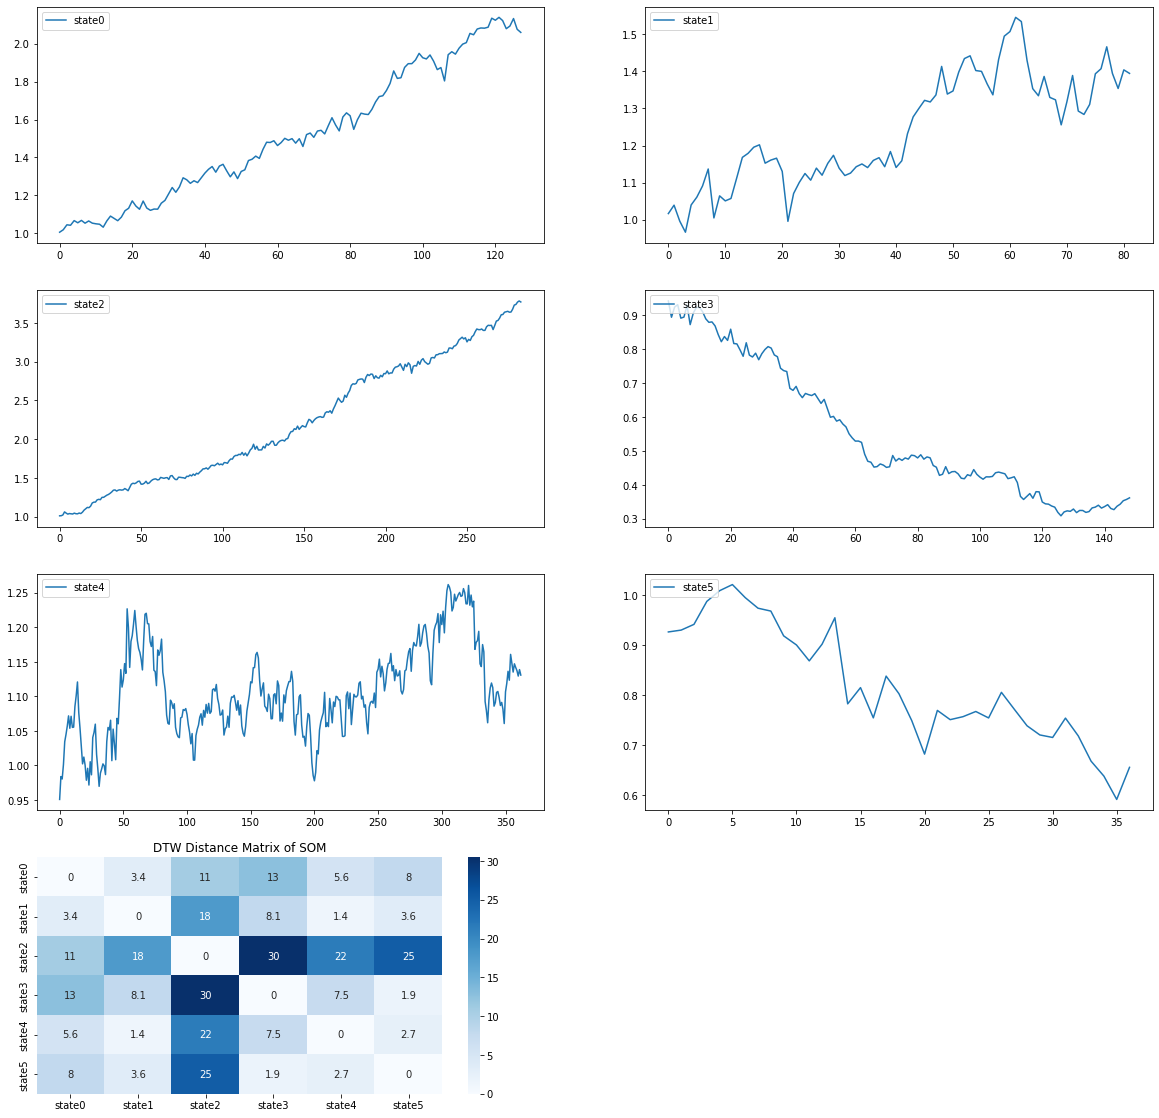

In [35]:
calculate_dtw_six(data_with_state)

In [54]:
data_with_state = combine_state(data_with_state, bull = [0,1,2], bear = [3,5], static = [4])

In [55]:
from collections import OrderedDict
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
def plot_candlestick(df,name,x,y,z):
    df = df.reset_index()
    ohlc = df.loc[:, ['Date','Open', 'High', 'Low', 'Close']]
    ohlc['Date']=ohlc['Date'].apply(mpl_dates.date2num)
    ohlc = ohlc.astype(float)
    fig, ax = plt.subplots(figsize=(20,10))

    candlestick_ohlc(ax, ohlc.values, width=4, colorup='green', colordown='red', alpha=1)

    # Setting labels & titles
    ax.set_xlabel('Date',fontsize=25)
    ax.set_ylabel('Price',fontsize=25)
    ax.set_title('Weekly Candlestick Chart of Russell3000 by GMM',fontsize=25)

    # Formatting Date
    date_format = mpl_dates.DateFormatter('%Y-%m-%d')
    ax.xaxis.set_major_formatter(date_format)
    plt.xticks(pd.date_range(start='12/31/1997', end='1/01/2018',freq='1y'))
    fig.autofmt_xdate()

    bull = df.loc[df[name] == x , 'Date']
    for day in bull:
        plt.axvspan(day, day + datetime.timedelta(weeks=1), color="green", alpha=0.15,label='bull')
    static = df.loc[df[name] == y , 'Date']
    for day in static:
        plt.axvspan(day, day + datetime.timedelta(weeks=1), color="blue", alpha=0.15,label='static')
    bear = df.loc[df[name] == z , 'Date']
    for day in bear:
        plt.axvspan(day, day + datetime.timedelta(weeks=1), color="red", alpha=0.15,label='bear')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),fontsize=25)
    plt.savefig('GMM.png',dpi=300)

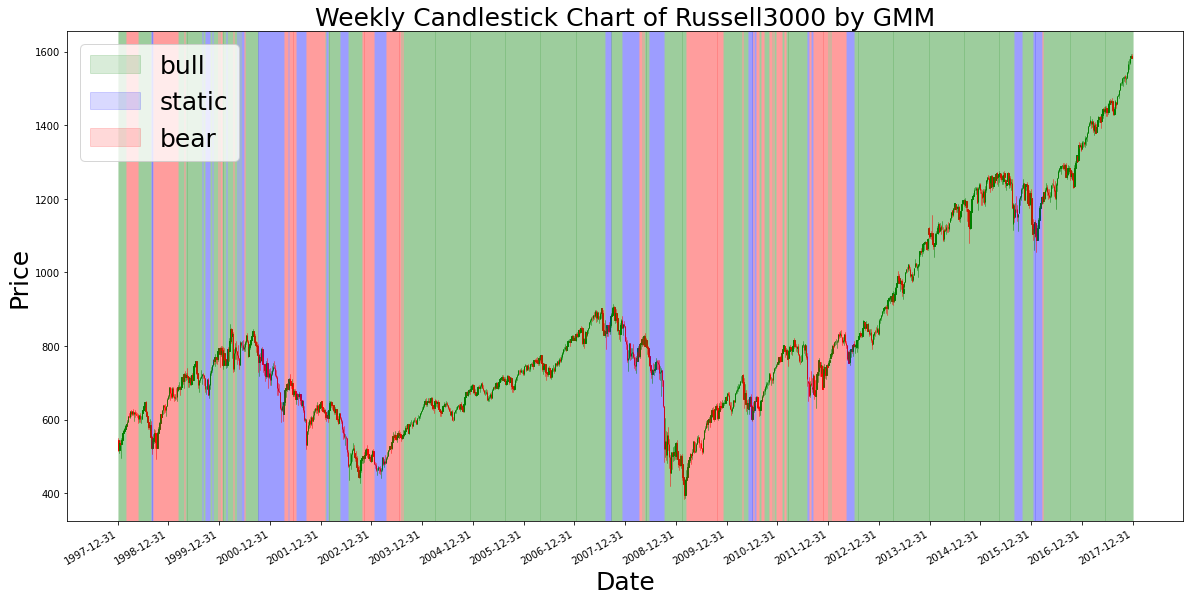

In [56]:
plot_candlestick(data_with_state,'new_state',1,0,-1)